# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products.

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [8]:
import pandas as pd


In [9]:
df = pd.read_excel('Online Retail.xlsx')

In [10]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# **Data Cleaning**

In [11]:
df = df.dropna(subset=['CustomerID'])
df = df.dropna(subset=['StockCode'])
df = df.dropna(subset=['InvoiceNo'])
df = df[df.Quantity > 0]
df = df[df.UnitPrice > 0]

In [12]:
duplicate_count = df.duplicated().sum()
print(f"Number of Duplicated Rows = {duplicate_count}")

Number of Duplicated Rows = 5192


In [13]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

# Sales trend **analysis**

In [14]:
rouped = df.groupby(['Year', 'Month'])['Quantity'].sum()
monthly_sales = rouped.reset_index(name='Quantity') # Change grouped to rouped
monthly_sales['Year'] = monthly_sales['Year'].astype(str)
print("monthly_sales columns:", monthly_sales.columns.tolist())
print(monthly_sales.head())

monthly_sales columns: ['Year', 'Month', 'Quantity']
   Year  Month  Quantity
0  2010     12    312265
1  2011      1    349098
2  2011      2    265622
3  2011      3    348503
4  2011      4    292222


In [15]:
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daily_sales = (
    df.groupby('DayOfWeek')['Quantity']
    .sum()
    .reindex(weekday_order)
    .reset_index()
)

# Top **sellers**

In [16]:
top_products = (
    df
    .groupby('Description')['Quantity']
    .sum()
    .nlargest(10)
    .reset_index()
)

In [17]:
top_countries = (
    df
    .groupby('Country')['Quantity']
    .sum()
    .nlargest(10)
    .reset_index()
)

# Outlier detection in **quantity**

In [18]:
desc_stats = df['Quantity'].describe()
quantity_iqr = desc_stats['75%'] - desc_stats['25%']
upper_bound = desc_stats['75%'] + 1.5 * quantity_iqr
outliers = df[df['Quantity'] > upper_bound]
print(f"Number of outlier transactions: {len(outliers)}")

Number of outlier transactions: 25647


# **Visualizations**

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

Monthly sales trend line plot

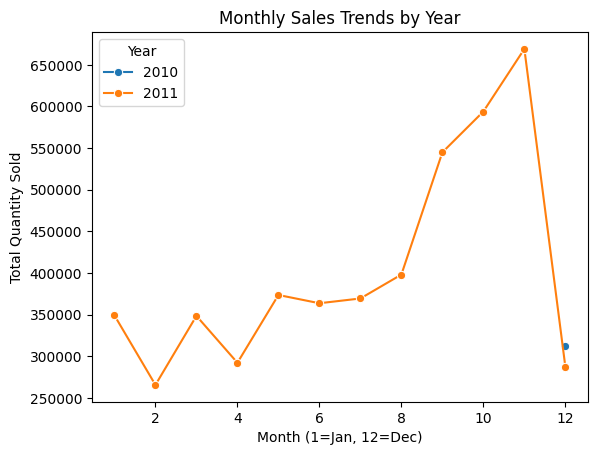

In [20]:
plt.figure()
sns.lineplot(
    data=monthly_sales,
    x='Month',
    y='Quantity',
    hue='Year',
    marker='o'
)
plt.title('Monthly Sales Trends by Year')
plt.xlabel('Month (1=Jan, 12=Dec)')
plt.ylabel('Total Quantity Sold')
plt.legend(title='Year')
plt.show()


 Sales by day of week bar plot

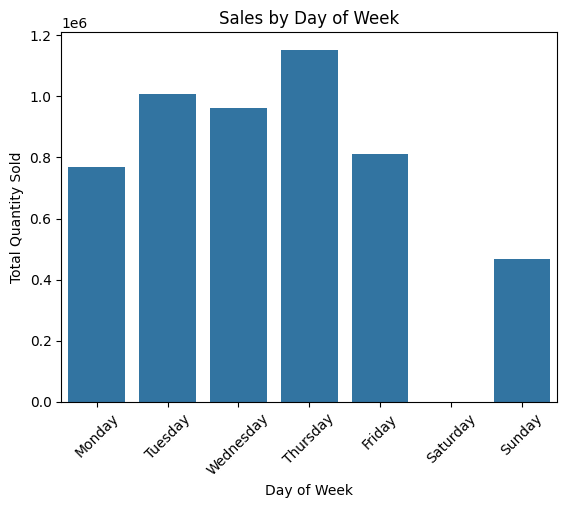

In [21]:
plt.figure()
sns.barplot(
    data=daily_sales,
    x='DayOfWeek',
    y='Quantity'
)
plt.title('Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

# *Top 10 products bar plot*

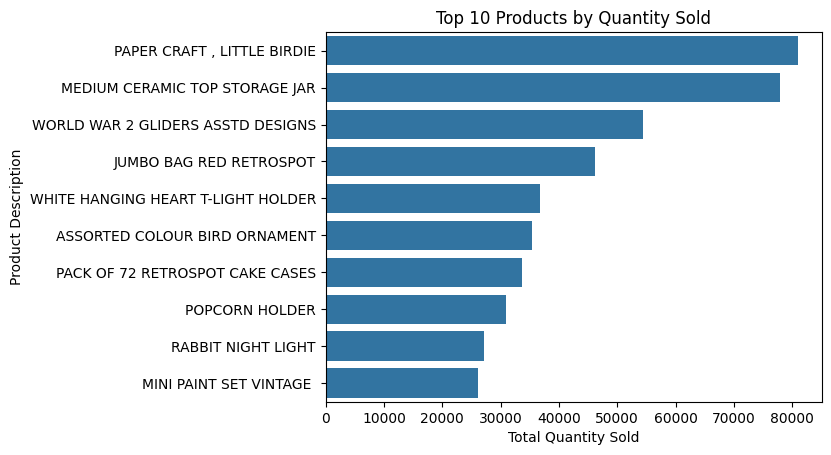

In [22]:
plt.figure()
sns.barplot(
    data=top_products,
    x='Quantity',
    y='Description'
)
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.show()

# *Top 10 countries bar plot*

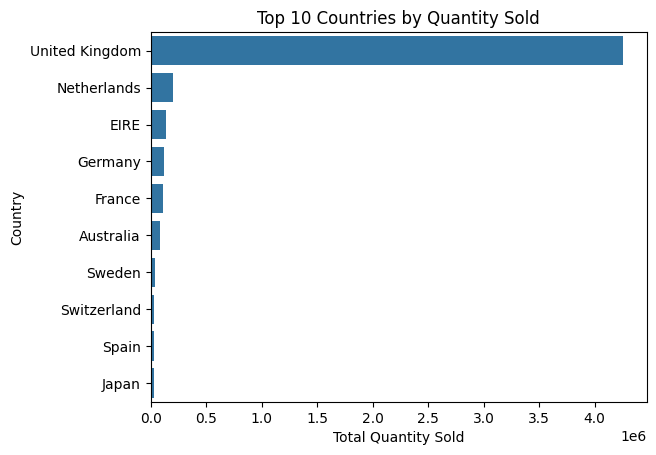

In [23]:
plt.figure()
sns.barplot(
    data=top_countries,
    x='Quantity',
    y='Country'
)
plt.title('Top 10 Countries by Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Country')
plt.show()

# *Mid‑week flash sales: Customers who buy on Thursdays*

In [24]:
thursday_orders = df[df['DayOfWeek'] == 'Thursday']
thursday_customers = thursday_orders['CustomerID'].unique()
print(f"Unique customers ordering on Thursday: {len(thursday_customers)}")

Unique customers ordering on Thursday: 2007


# *Q4 inventory planning: Top products in December*

In [25]:
december_sales = df[df['Month'] == 12]
top_dec_products = (
    december_sales
    .groupby('Description')['Quantity']
    .sum()
    .nlargest(10)
)
print("Top 10 December products by volume:\n", top_dec_products)


Top 10 December products by volume:
 Description
PAPER CRAFT , LITTLE BIRDIE           80995
WORLD WAR 2 GLIDERS ASSTD DESIGNS      6502
POPCORN HOLDER                         5362
WHITE HANGING HEART T-LIGHT HOLDER     4356
PACK OF 72 RETROSPOT CAKE CASES        3856
RABBIT NIGHT LIGHT                     3691
ASSORTED COLOUR BIRD ORNAMENT          3541
HAND WARMER BABUSHKA DESIGN            3436
DISCO BALL CHRISTMAS DECORATION        3304
BLACK RECORD COVER FRAME               3302
Name: Quantity, dtype: int64


# *Outlier audit: Inspect the largest‑quantity orders*

In [26]:
top_outliers = (
    outliers
    .sort_values('Quantity', ascending=False)
    .head(20)
    [['InvoiceNo','Description','Quantity','CustomerID']]
)
print("Top 20 high‑quantity transactions for manual review:\n", top_outliers)


Top 20 high‑quantity transactions for manual review:
        InvoiceNo                          Description  Quantity  CustomerID
540421    581483          PAPER CRAFT , LITTLE BIRDIE     80995     16446.0
61619     541431       MEDIUM CERAMIC TOP STORAGE JAR     74215     12346.0
421632    573008    WORLD WAR 2 GLIDERS ASSTD DESIGNS      4800     12901.0
206121    554868                 SMALL POPCORN HOLDER      4300     13135.0
97432     544612                EMPIRE DESIGN ROSETTE      3906     18087.0
270885    560599  ESSENTIAL BALM 3.5g TIN IN ENVELOPE      3186     14609.0
160546    550461   FAIRY CAKE FLANNEL ASSORTED COLOUR      3114     15749.0
52711     540815   FAIRY CAKE FLANNEL ASSORTED COLOUR      3114     15749.0
433788    573995          SMALL CHINESE STYLE SCISSOR      3000     16308.0
291249    562439        ASSORTED COLOUR BIRD ORNAMENT      2880     12931.0
4945      536830    WORLD WAR 2 GLIDERS ASSTD DESIGNS      2880     16754.0
201149    554272   PACK OF 60 PINK

# *International growth: Focus markets outside the U.K.*

In [27]:
intl_sales = df[df['Country'] != 'United Kingdom']
country_volumes = (
    intl_sales
    .groupby('Country')['Quantity']
    .sum()
    .sort_values(ascending=False)
)
print("International markets by total volume:\n", country_volumes.head(10))

International markets by total volume:
 Country
Netherlands    200361
EIRE           140275
Germany        119261
France         111471
Australia       83901
Sweden          36083
Switzerland     30082
Spain           27940
Japan           26016
Belgium         23237
Name: Quantity, dtype: int64


## **Final Remarks as a Data Analyst**

* **Revenue is Highly Concentrated**
  A small group of customers and products account for a large portion of total revenue. This reflects a typical 80/20 rule (Pareto principle), where focused efforts on top-performing customers and items can yield significant returns.

* **Repeat Purchases Indicate Loyalty**
  The presence of frequent buyers and high RFM scores for certain segments indicate customer loyalty. These customers should be nurtured through retention campaigns and personalized offers.

* **UK Dominates Sales, But Other Countries Show Promise**
  While the UK is the primary market, countries like the Netherlands and Germany show noteworthy activity. These are potential areas for international growth and marketing investment.

* **Product Trends Suggest Core Inventory**
  Several products consistently appear in top-selling lists, suggesting they are core inventory items. These should be prioritized in stock management and promotional strategies.

* **Seasonality is Evident in Sales Patterns**
  Peaks around November suggest seasonal buying behavior, likely linked to holiday shopping. Businesses should prepare marketing and inventory strategies accordingly.

* **Data Anomalies Require Attention**
  Transactions with negative quantities and prices, although filtered, may indicate systemic issues (returns, errors, or fraud). These anomalies should be investigated to improve data integrity and business processes.

* **High Return Rates Could Affect Profit Margins**
  Many canceled or reversed transactions point to possible customer dissatisfaction or logistical issues. Understanding and reducing return reasons could directly enhance profitability.

* **Segmentation Enables Targeted Strategy**
  RFM-based segmentation enables businesses to tailor campaigns for different customer types, enhancing personalization and return on investment.

